\author{Fan Jiang, 11310129}

# Introduction

This document is the solution on stationary random processes for the DSP Autumn 2015 session.

In [1]:
%load_ext oct2py.ipython
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# MATLAB Practice

**(1)**

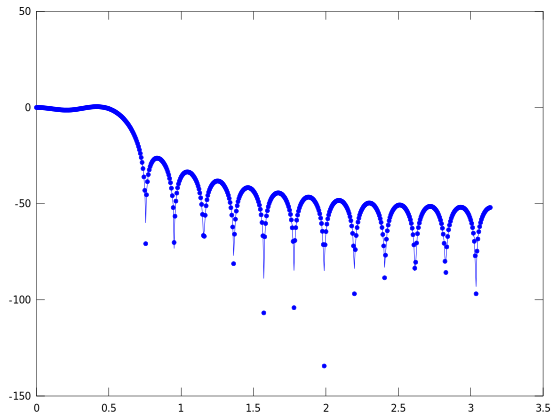

In [50]:
%%octave -o x,y
clc;
clear all;
close all;
pkg load signal
h = fir1(30,0.2,rectwin(31));
x = randn(16384,1);
y = filter(h,1,x);

[Txy, F] = tfestimate(x,y,1024,[],[],2*pi);
[H,W]=freqz(h);
plot(F,10*log(abs(Txy)));
hold on;
plot(W,10*log(H),'.');

**(2)**

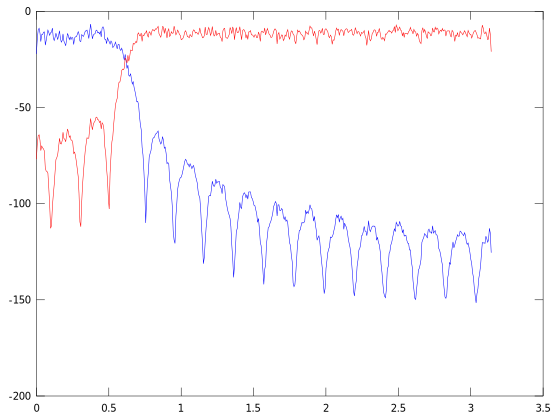

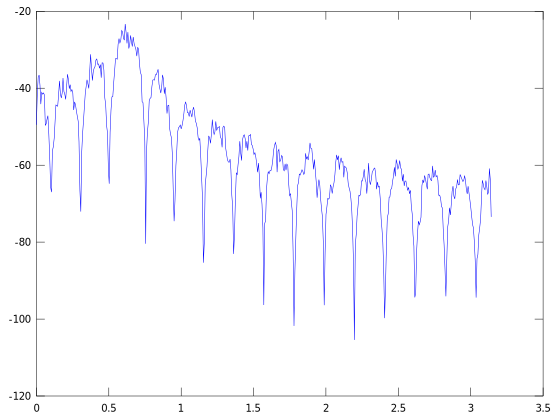

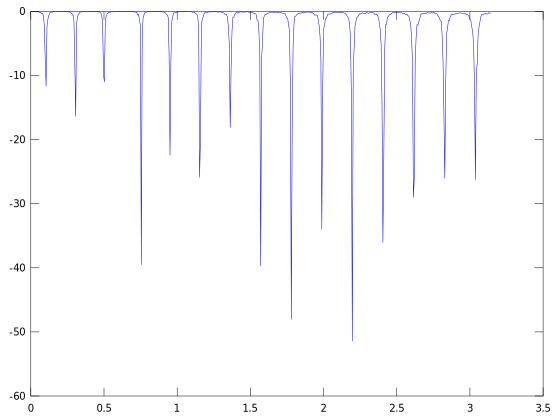

In [77]:
%%octave -o x,y
clc;
clear all;
close all;
pkg load signal
h1 = fir1(30,0.2,'low',rectwin(31));
h2 = fir1(30,0.2,'high',rectwin(31));
x = randn(16384,1);
y1 = filter(h1,1,x);
y2 = filter(h2,1,x);

[Ty1, F1] = pwelch(y1,1024,[],[],2*pi);
[Ty2, F2] = pwelch(y2,1024,[],[],2*pi);
[Txy, F]  = cpsd(y1,y2,1024,[],[],2*pi);
[Coh, F_coh]  = mscohere(y1,y2,1024,[],[],2*pi);
plot(F1,10*log(abs(Ty1)));
hold on;
plot(F2,10*log(abs(Ty2)),'r');
figure;
plot(F,10*log(abs(Txy)));
figure;
plot(F_coh,10*log(abs(Coh)));

## Comments

The cross-PSD signifies the overlap in frequency of the two filters. The spectral coherence signifies the correlation in each frequency of the two signals.